In [44]:
import pandas as pd
import os

# Define the relative path to the data folder
db_path = os.path.join('..', 'data')

# Load df_final_dbscan
df_final_dbscan_path = os.path.join(db_path, 'df_final_dbscan.csv')
df_final_dbscan = pd.read_csv(df_final_dbscan_path)

# Load df_final_kmeans
df_final_kmeans_path = os.path.join(db_path, 'df_final_kmeans.csv')
df_final_kmeans = pd.read_csv(df_final_kmeans_path)

# Verify the loaded DataFrames
print("Loaded df_final_dbscan head:")
df_final_dbscan.head()

print("Loaded df_final_kmeans head:")
df_final_kmeans.head()


Loaded df_final_dbscan head:
Loaded df_final_kmeans head:


,customer_unique_id,index_order,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,index_customer,...,RFMGroup_343,RFMGroup_344,RFMGroup_411,RFMGroup_412,RFMGroup_413,RFMGroup_414,RFMGroup_441,RFMGroup_442,RFMGroup_443,RFMGroup_444
0,7c396fd4830fd04220f754e42b4e5bff,0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,70296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,af07308b275d755c9edb36a90c618231,1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,77027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3a653a41f6f9fc3d2a113cf8398680e8,2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,554,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7c142cf63193a1473d2e66489a9ae977,3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,61081,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,72632f0f9dd73dfee390c9b22eb56dd6,4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,67263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### KMeans Clustering - Elbow Method

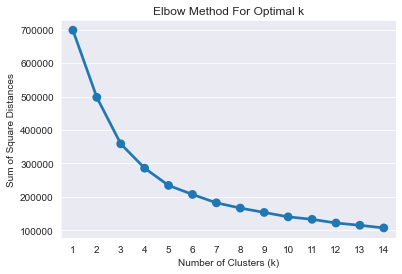

In [45]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for KMeans clustering
numeric_features = ['Recency', 'Frequency', 'Monetary', 'avg_review_score', 'review_count', 'RFMScore']

# Ensure only numeric features are used
df_final_kmeans_numeric = df_final_kmeans[numeric_features]

# Define the number of clusters
sum_of_squared_distances = []
for K in range(1, 15):
    km = KMeans(n_clusters=K, init='k-means++', max_iter=100, random_state=42)
    km = km.fit(df_final_kmeans_numeric)
    sum_of_squared_distances.append(km.inertia_)

# Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x=list(range(1, 15)), y=sum_of_squared_distances)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [46]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(df_final_kmeans_numeric)

#Find the clusters for the observation given in the dataset
df_final_kmeans['Cluster'] = KMean_clust.labels_
df_final_kmeans.head(10)

,customer_unique_id,index_order,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,index_customer,...,RFMGroup_344,RFMGroup_411,RFMGroup_412,RFMGroup_413,RFMGroup_414,RFMGroup_441,RFMGroup_442,RFMGroup_443,RFMGroup_444,Cluster
0,7c396fd4830fd04220f754e42b4e5bff,0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,70296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,af07308b275d755c9edb36a90c618231,1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,77027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3a653a41f6f9fc3d2a113cf8398680e8,2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,554,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,7c142cf63193a1473d2e66489a9ae977,3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,61081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,72632f0f9dd73dfee390c9b22eb56dd6,4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,67263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,80bb27c7c16e8f973207a5086ab329e2,5,a4591c265e18cb1dcee52889e2d8acc3,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,68381,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
6,36edbb3fb164b1f16485364b6fb04c73,6,136cce7faa42fdb2cefd53fdc79a6098,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,2017-05-09 00:00:00,2017-05-09 00:00:00,2017-05-09,76073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
7,932afa1e708222e5821dac9cd5db4cae,7,6514b8ad8028c9f2cc2374ded245783f,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,86945,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
8,39382392765b6dc74812866ee5ee92a7,8,76c6e866289321a7c93b82b54852dc33,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,35466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
9,299905e3934e9e181bfb2e164dd4b4f8,9,e69bfb5eb88e0ed6a785585b27e16dbf,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,90725,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


<Figure size 720x576 with 0 Axes>

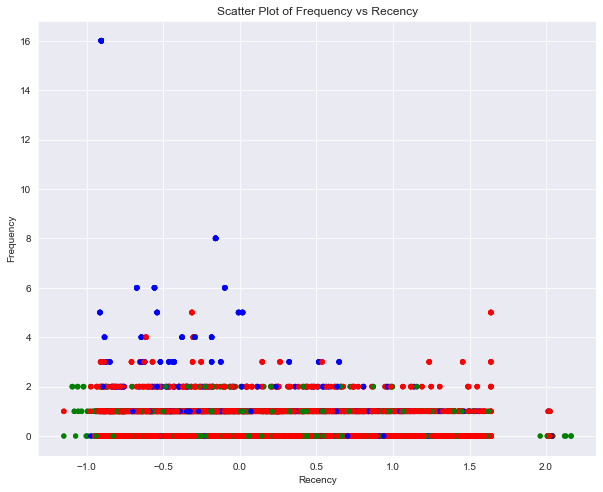

In [47]:
from matplotlib import pyplot as plt
import seaborn as sns

# Assuming the 'Cluster' column is already created by KMeans clustering

plt.figure(figsize=(10, 8))

# Define colors for clusters
Colors = ["red", "green", "blue"]

# Map cluster labels to colors
df_final_kmeans['Color'] = df_final_kmeans['Cluster'].map(lambda p: Colors[p])

# Create scatter plot for Frequency vs Recency
ax = df_final_kmeans.plot(
    kind="scatter", 
    x="Recency", 
    y="Frequency",
    c=df_final_kmeans['Color'],
    figsize=(10, 8)
)

# Add titles and labels
plt.title('Scatter Plot of Frequency vs Recency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()


<Figure size 720x576 with 0 Axes>

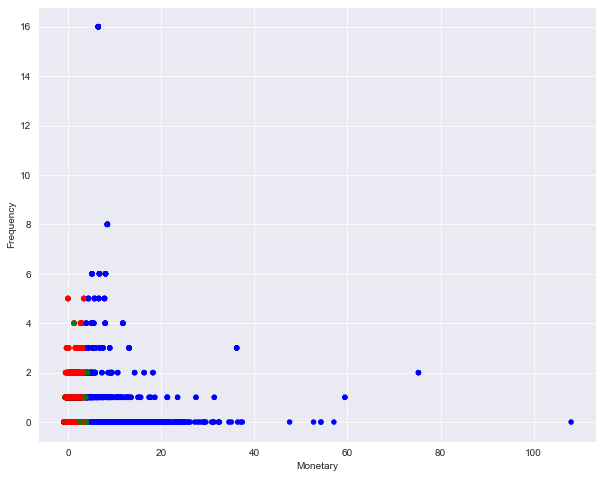

In [48]:
# Create scatter plot for Monetary vs Frequency
plt.figure(figsize=(10, 8))
ax = df_final_kmeans.plot(
    kind="scatter", 
    x="Monetary", 
    y="Frequency",
    c=df_final_kmeans['Color'],
    figsize=(10, 8)
)

<Figure size 720x576 with 0 Axes>

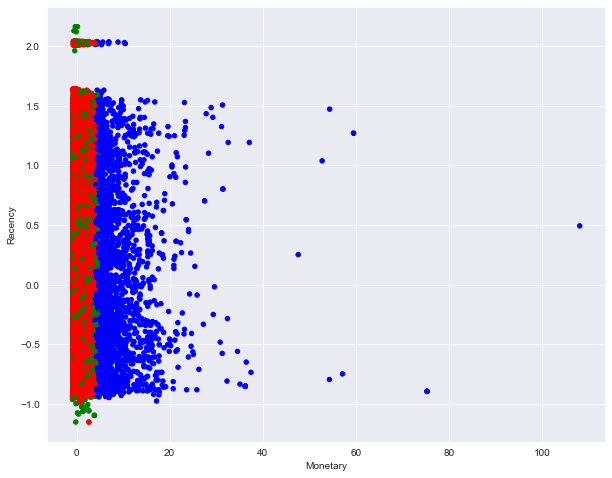

In [49]:
# Create scatter plot for Monetary vs Recency
plt.figure(figsize=(10, 8))
ax = df_final_kmeans.plot(
    kind="scatter", 
    x="Monetary", 
    y="Recency",
    c=df_final_kmeans['Color'],
    figsize=(10, 8)
)

<Figure size 720x576 with 0 Axes>

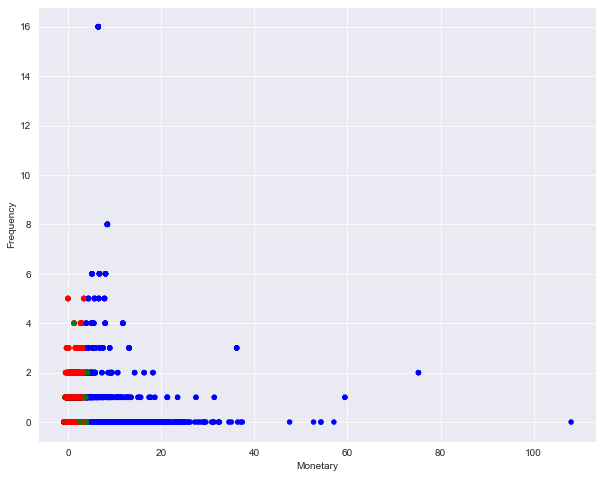

In [50]:
# Create scatter plot for Monetary vs Frequency
plt.figure(figsize=(10, 8))
ax = df_final_kmeans.plot(
    kind="scatter", 
    x="Monetary", 
    y="Frequency",
    c=df_final_kmeans['Color'],
    figsize=(10, 8)
)

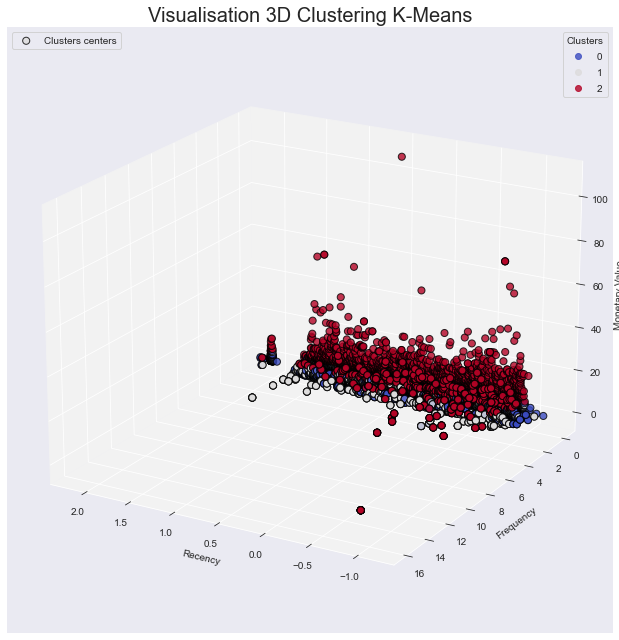

In [51]:
import pandas as pd
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


# Sélectionner les caractéristiques pour le clustering
features = ['Recency', 'Frequency', 'Monetary', 'avg_review_score', 'review_count', 'RFMScore']

# Appliquer KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_final_kmeans[features])

# Récupérer les centres des clusters et les étiquettes
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualisation 3D
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Créer un graphique de dispersion 3D des points de données colorés par cluster
scatter = ax.scatter(df_final_kmeans['Recency'], df_final_kmeans['Frequency'], df_final_kmeans['Monetary'], c=labels, cmap='coolwarm', edgecolor='k', s=50, alpha=0.8)
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], marker='X', color='red', s=200, edgecolor='k', label='Clusters centers')

# Étiquettes et titre
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.set_title('Visualisation 3D Clustering K-Means', size=20)

# Améliorations
ax.grid(True)
ax.xaxis.set_pane_color((0.95, 0.95, 0.95, 1.0))
ax.yaxis.set_pane_color((0.95, 0.95, 0.95, 1.0))
ax.zaxis.set_pane_color((0.95, 0.95, 0.95, 1.0))
ax.view_init(elev=20, azim=120)  # Ajuster pour le meilleur angle

# Légende
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
ax.legend(['Clusters centers'], loc='upper left')

plt.tight_layout()
plt.show()


### DBSCAN Clustering

In [52]:
# Import DBSCAN
from sklearn.cluster import DBSCAN

# Select only numeric columns for DBSCAN clustering
numeric_features = ['Recency', 'Frequency', 'Monetary', 'avg_review_score', 'review_count', 'RFMScore']

# Ensure only numeric features are used
df_final_dbscan_numeric = df_final_dbscan[numeric_features]

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=2)
dbscan.fit(df_final_dbscan_numeric)

# Find the clusters for the observation given in the dataset
df_final_dbscan['Cluster'] = dbscan.labels_
df_final_dbscan.head(10)


MemoryError: 